# **<u>Project</u>: <u>EDA & Stats using Insurance Data<u>**

## **<u>MetaData<u>:**
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively
- high or low relative to height, objective index of body weight (kg / m ^ 2) using the
ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest,
northwest.
- charges: Individual medical costs billed by health insurance.

    
**<u>Objective<u>:<br>**
We want to see if we can dive deep into this data to find some valuable insights.

    
**<u>Steps and tasks<u>:<br>**
1. Import the necessary libraries (2 marks)
2. Read the data as a data frame (2 marks)
3. Perform basic EDA which should include the following and print out your insights
at every step. (28 marks)
    - Shape of the data (2 marks)
    - Data type of each attribute (2 marks)
    - Checking the presence of missing values (3 marks)
    - 5 point summary of numerical attributes (3 marks)
    - Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)
    - Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)
    - Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)
    - Distribution of categorical columns (include children) (4 marks)
    - Pair plot that includes all the columns of the data frame (4 marks)
4. Answer the following questions with statistical evidence (28 marks)
    - Do charges of people who smoke differ significantly from the people who don't? (7 marks)
    - Does bmi of males differ significantly from that of females? (7 marks)
    - Is the proportion of smokers significantly different in different genders? (7 marks)
    - Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [3]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance_df.shape

(1338, 7)

In [14]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
insurance_df.isnull().sum()
# No missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
# 5-point summary: min, Q1, Median, Q3, max
def five_point_summary(var):
    minimum = np.min(var)
    q1, q3 = np.percentile(var, [25,75])
    median = np.median(var)
    maximum = np.max(var)
    d = {"Minimum": minimum, "Q1": q1, "Median": median, "Q3": q3, "Maximum": maximum, "IQR": q3-q1}
    return d

In [18]:
insurance_df.dtypes['age']

dtype('int64')

In [61]:
five_P_summary = {}
for i in insurance_df.columns.tolist():
    if insurance_df.dtypes[i] != 'object':
        five_P_summary[i] = five_point_summary(insurance_df[i])
        print(i)
        print(five_point_summary(insurance_df[i]))
        print()

age
{'Minimum': 18, 'Q1': 27.0, 'Median': 39.0, 'Q3': 51.0, 'Maximum': 64, 'IQR': 24.0}

bmi
{'Minimum': 15.96, 'Q1': 26.29625, 'Median': 30.4, 'Q3': 34.69375, 'Maximum': 53.13, 'IQR': 8.3975}

children
{'Minimum': 0, 'Q1': 0.0, 'Median': 1.0, 'Q3': 2.0, 'Maximum': 5, 'IQR': 2.0}

charges
{'Minimum': 1121.8739, 'Q1': 4740.28715, 'Median': 9382.033, 'Q3': 16639.912515, 'Maximum': 63770.42801, 'IQR': 11899.625365}



- Skewness = 0: Then normally distributed.
- Skewness > 0: Then more weight in the left tail of the distribution.
- Skewness < 0: Then more weight in the right tail of the distribution.
<br><br>
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed


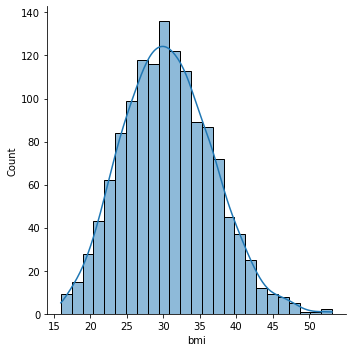

In [22]:
sns.displot(data=insurance_df['bmi'], kde=True);
# BMI follows a normal distribution

In [33]:
insurance_df.bmi.skew()

0.2840471105987448

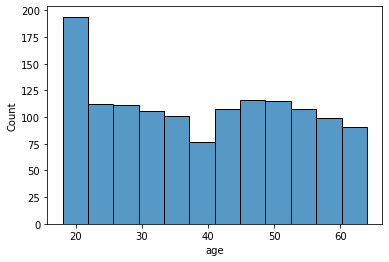

In [27]:
sns.histplot(data=insurance_df['age']);
# People of age group around 20, probably 18-25 year olds take more insurance

In [29]:
insurance_df.age.skew()

0.05567251565299186

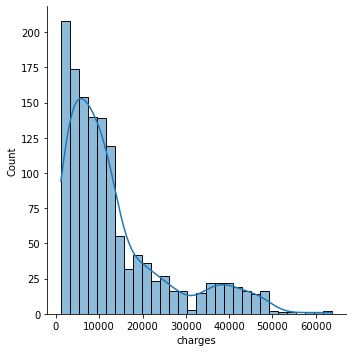

In [24]:
sns.displot(data=insurance_df['charges'], kde=True);
# Almost a right skewed normal distribution
# Most people's medical bills are around $1100 - $10000

In [38]:
insurance_df.charges.skew()
# Highly Skewed

1.5158796580240388

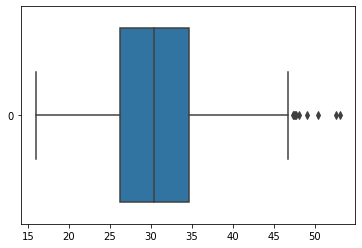

In [45]:
sns.boxplot(data=insurance_df['bmi'], orient='h');

In [57]:
five_P_summary['bmi']["Q3"]

34.69375

In [68]:
# sns.scatterplot(data=insurance_df['bmi'])
upper_bound_bmi = five_P_summary['bmi']["Q3"] + 1.5*five_P_summary['bmi']["IQR"]
print("Outliers:")
np.where(insurance_df['bmi'] > upper_bound_bmi)

Outliers:


(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

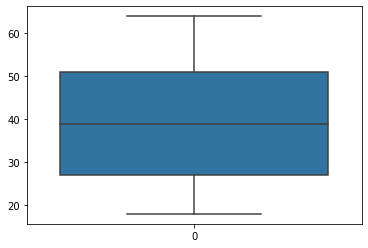

In [43]:
sns.boxplot(data = insurance_df['age'], orient='h');

In [69]:
# No outliers
upper_bound_age = five_P_summary['age']["Q3"] + 1.5*five_P_summary['age']["IQR"]
print("Outliers:")
np.where(insurance_df['age'] > upper_bound_age)

Outliers:


(array([], dtype=int64),)

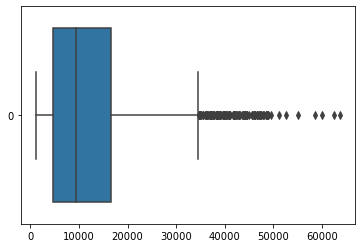

In [46]:
sns.boxplot(data = insurance_df['charges'], orient='h');

In [82]:
upper_bound_charges = five_P_summary['charges']["Q3"] + 1.5*five_P_summary['charges']["IQR"]

outliers_charges = np.where(insurance_df['charges'] > upper_bound_charges)
print("No. of Outliers:", len(outliers_charges[0]))

No. of Outliers: 139


In [87]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [108]:
children = insurance_df.groupby('children').sum()
children

,age,bmi,charges
children,,,
0,22067,17535.870,7.098070e+06
1,12783,9921.900,4.124900e+06
2,9467,7434.745,3.617655e+06
3,6526,4817.440,2.410785e+06
4,975,784.780,3.462664e+05
5,641,532.890,1.581486e+05


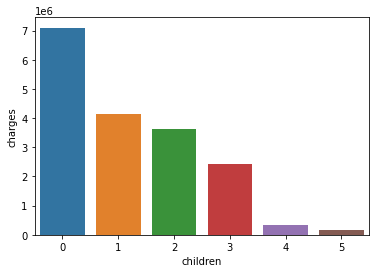

In [109]:
sns.barplot(x = children.index, y = children.charges);
# People with no children have significantly high medical costs billed by health insurance.

In [111]:
gender = insurance_df.groupby('sex').count()
gender
# Females smoke relatively less than males

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [114]:
gender = insurance_df.groupby('sex').sum()
gender

,age,bmi,children,charges
sex,,,,
female,26151,20110.070,711,8.321061e+06
male,26308,20917.555,754,9.434764e+06


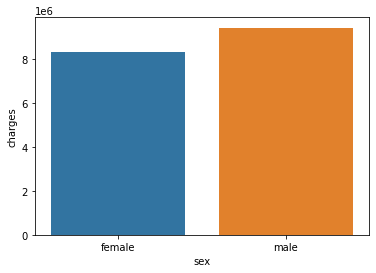

In [116]:
sns.barplot(x=gender.index,y= gender.charges);
# Males have high medical bills than females

In [122]:
smoker = insurance_df.groupby('smoker').sum()
smoker
# It seems that non-smokers pay slightly hig medical bills than smokers

,age,bmi,children,charges
smoker,,,,
no,41906,32613.510,1160,8.974061e+06
yes,10553,8414.115,305,8.781764e+06


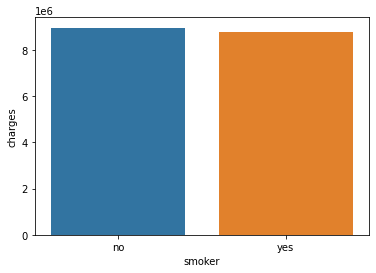

In [123]:
sns.barplot(x=smoker.index,y= smoker.charges);

In [127]:
region = insurance_df.groupby('region').count()
region

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


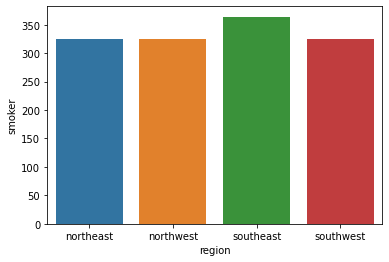

In [128]:
sns.barplot(x=region.index,y= region.smoker);
# South-east have more smokers while other regions have almost same no. of smokers

In [129]:
region = insurance_df.groupby('region').sum()
region

,age,bmi,children,charges
region,,,,
northeast,12723,9452.215,339,4.343669e+06
northwest,12739,9489.930,373,4.035712e+06
southeast,14174,12141.580,382,5.363690e+06
southwest,12823,9943.900,371,4.012755e+06


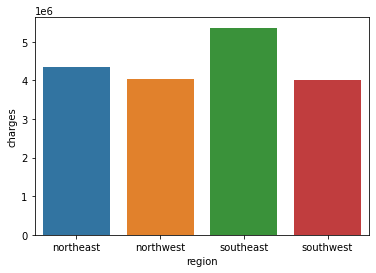

In [130]:
sns.barplot(x=region.index,y= region.charges);
# South-east people pay higher medical bills than other region

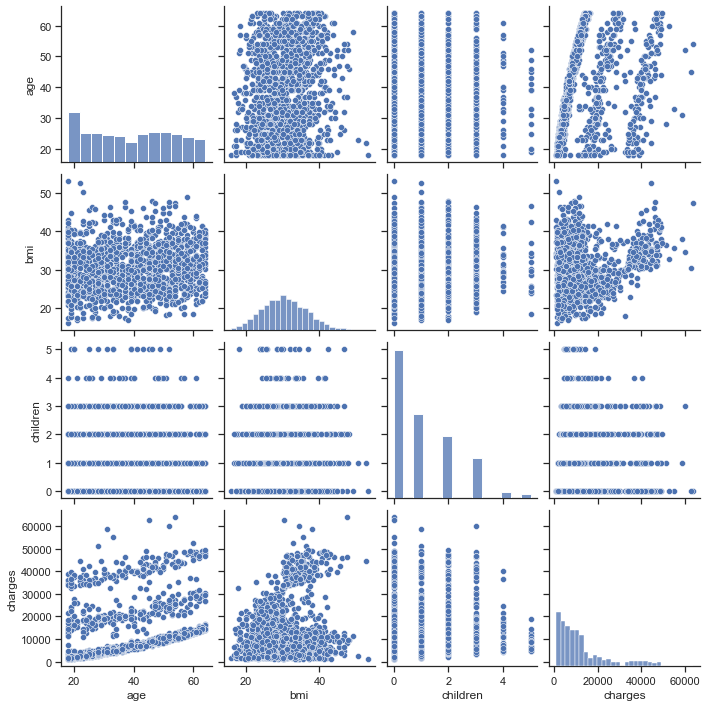

In [137]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = insurance_df);

**Q. Do charges of people who smoke differ significantly from the people who
don't?**

In [140]:
insurance_df.groupby("smoker").sum().charges
# People who don't smoke pay more charges

smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64

**Q. Does bmi of males differ significantly from that of females?**

In [143]:
insurance_df.groupby("sex").sum().bmi
# Females have low bmi comapred to men

sex
female    20110.070
male      20917.555
Name: bmi, dtype: float64

**Q. Is the proportion of smokers significantly different in different genders?**

In [153]:
insurance_df.groupby("sex").count().smoker
# Females smoke less but not significantly less than men

sex
female    662
male      676
Name: smoker, dtype: int64

**Q. Is the distribution of bmi across women with no children, one child and
two children, the same?**

In [175]:
female = insurance_df[insurance_df['sex']=='female'].groupby('children').mean()
female

,age,bmi,charges
children,,,
0,38.346021,30.361522,11905.714276
1,39.506329,30.052658,12161.360414
2,40.512605,30.649790,13941.317326
3,42.181818,30.436429,13865.605066
4,42.000000,31.943182,13937.674562
5,37.000000,30.620625,9854.006419


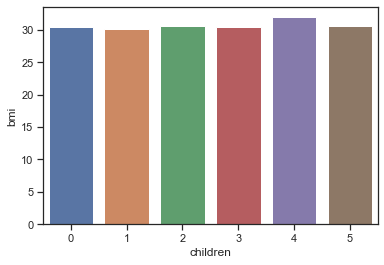

In [176]:
sns.barplot(x =female.index ,y = female.bmi);

In [179]:
# On an average distribution of bmi is same across all groups of females